In [79]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 

### Load Dataset

In [ ]:
data = pd.read_csv('raw_products_data.csv', index_col=False)

In [82]:
data.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
data.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [5]:
data.shape

(3000888, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


### Check Missing Values

In [7]:
data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

### Check Missing Values

In [83]:
data.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis

In [84]:
data['date'] = pd.to_datetime(data['date'])

# Generate the full range of weekly dates
start_date = data['date'].min()
end_date = data['date'].max()
full_week_range = pd.date_range(start=start_date, end=end_date, freq='W-TUE')  # weeks end on Thursday

# Find missing weeks
actual_weeks = set(data['date'])
full_weeks = set(full_week_range)
missing_weeks = full_weeks - actual_weeks

# Format Data
start_date = datetime.strftime(start_date, '%B %d, %Y')
end_date = datetime.strftime(end_date, '%B %d, %Y')

print(f'Data ranges from {start_date} to {end_date}')
print("Missing Weeks:", len(missing_weeks))
print('Total Number of Unique weeks: ', data['date'].nunique())

Data ranges from January 01, 2013 to August 15, 2017
Missing Weeks: 0
Total Number of Unique weeks:  1684


In [85]:
print('Total Products Categories: ', data['family'].nunique())
print('Total Number of Unique Stores: ', data['store_nbr'].nunique())

Total Products Categories:  33
Total Number of Unique Stores:  54


In [91]:
category_sales = data.groupby('family')['sales'].sum()

# Sort to find the highest sales
top_categories = category_sales.sort_values(ascending=False)
top_categories.tail()

family
MAGAZINES          266359.0
HARDWARE           103470.0
HOME APPLIANCES     41601.0
BABY CARE           10051.0
BOOKS                6438.0
Name: sales, dtype: float64

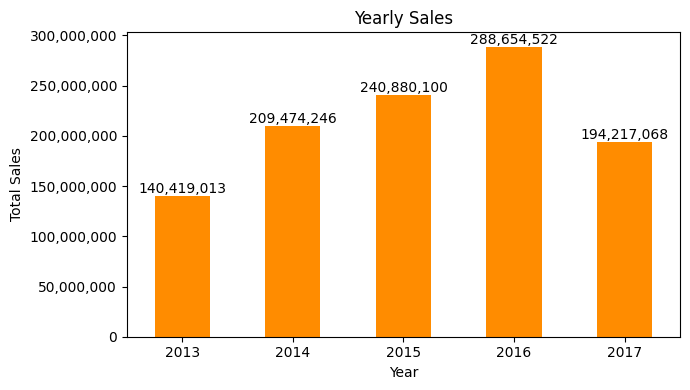

In [86]:
# Get yearly sales
data['year'] = data['date'].dt.year
yearly_sales = data.groupby('year')['sales'].sum()

#plot graph
plt.figure(figsize=(7,4))
ax = yearly_sales.plot(kind='bar', color='#ff8c00')

# Set title and labels
plt.title("Yearly Sales", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Total Sales")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}')) #  To format y-axis ticks with full units
plt.xticks(rotation=0)

# Display the value on top of each bar
for i, v in enumerate(yearly_sales):
    ax.text(i, v + 10000, f'{int(v):,}', ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

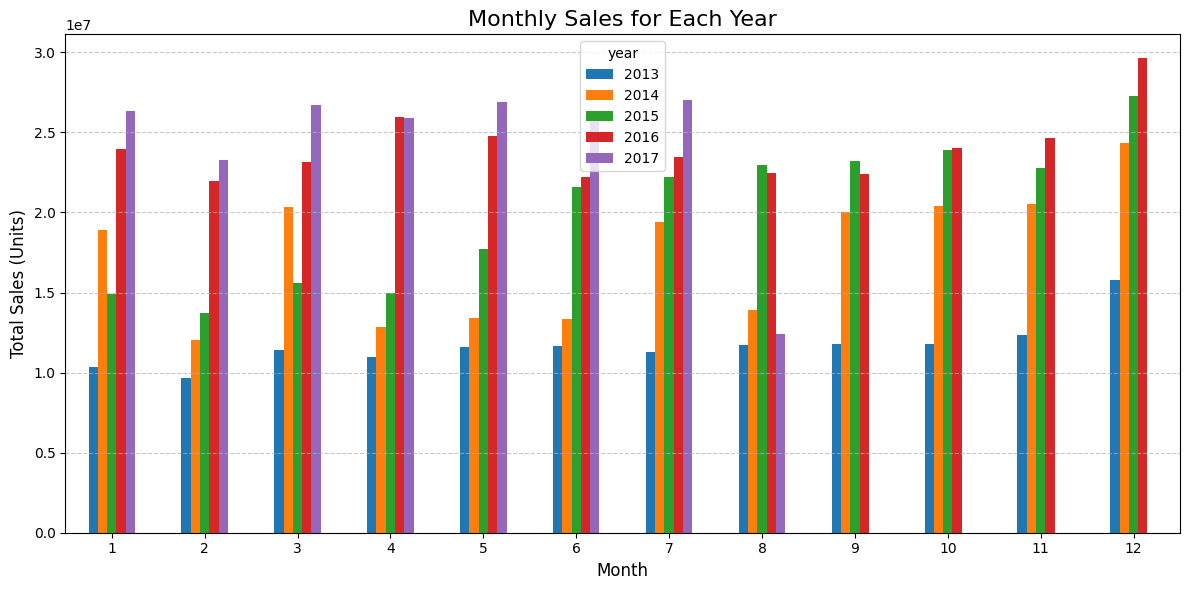

In [88]:
# Extract the month from date
data['month'] = data['date'].dt.month

# Group by year and month to calculate total sales per month
monthly_sales = data.pivot_table(index='month', columns='year', values='sales', aggfunc='sum')

# Plotting Monthly Sales for Each Year
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', stacked=False, figsize=(12, 6))

# Set title and labels
plt.title("Monthly Sales for Each Year", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (Units)", fontsize=12)
plt.xticks(rotation=0)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [13]:
product_sale_df = data.groupby(['date','family'])['sales'].sum().reset_index()
product_sale_df

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,2.000000
3,2013-01-01,BEVERAGES,810.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
55567,2017-08-15,POULTRY,17586.709986
55568,2017-08-15,PREPARED FOODS,4641.522980
55569,2017-08-15,PRODUCE,125108.971000
55570,2017-08-15,SCHOOL AND OFFICE SUPPLIES,2530.000000


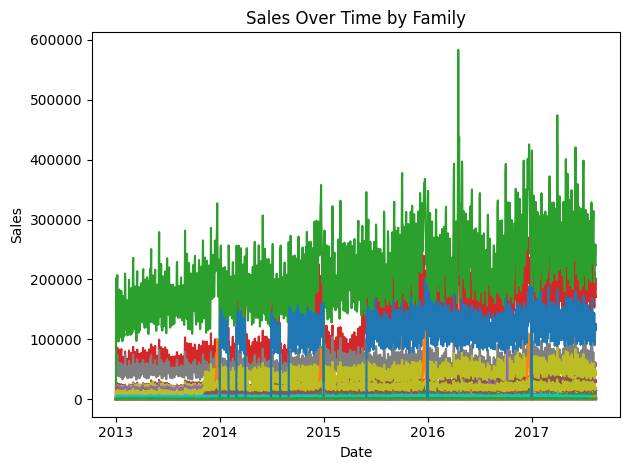

In [92]:
# Loop through each unique family and plot
plt.figure(figure=(10,8))
for family in product_sale_df['family'].unique():
    family_data = product_sale_df[product_sale_df['family'] == family]
    plt.plot(family_data['date'], family_data['sales'], label=family)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time by Family')

## Move the legend outside the plot area to avoid congestion
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

In [93]:
# Create the pivot table and reset the index
total_product_sale_df = data.pivot_table(index='date', columns='family', values='sales', aggfunc='sum').reset_index()
total_product_sale_df

family,date,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,2013-01-01,0.0,0.0,2.0,810.0,0.0,180.58900,0.0,186.0,143.0,...,0.0,110.801000,25.0,0.0,0.0,42.637000,37.847000,0.00000,0.0,0.000000
1,2013-01-02,255.0,0.0,207.0,72092.0,0.0,26246.31900,0.0,74629.0,23381.0,...,0.0,20871.464028,17204.0,0.0,0.0,13975.884938,5338.111976,0.00000,0.0,1526.750002
2,2013-01-03,161.0,0.0,125.0,52105.0,0.0,18456.48002,0.0,55893.0,18001.0,...,0.0,16597.398113,12568.0,0.0,0.0,10674.393983,3591.388005,0.00000,0.0,1094.310994
3,2013-01-04,169.0,0.0,133.0,54167.0,0.0,16721.96901,0.0,52064.0,18148.0,...,0.0,21625.963055,11303.0,0.0,0.0,10772.515038,4472.965990,0.00000,0.0,1293.120995
4,2013-01-05,342.0,0.0,191.0,77818.0,0.0,22367.76108,0.0,70128.0,23082.0,...,0.0,20879.091050,16819.0,0.0,0.0,13475.009055,5830.073020,0.00000,0.0,1245.637004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2017-08-11,441.0,7.0,351.0,189111.0,0.0,28204.48600,870.0,55682.0,44909.0,...,500.0,26944.092010,15978.0,587.0,654.0,25318.297990,5199.494021,118738.14300,3523.0,1272.615997
1680,2017-08-12,403.0,3.0,369.0,182318.0,0.0,27403.54800,849.0,57935.0,42854.0,...,483.0,17775.650112,15903.0,508.0,712.0,19134.510058,4573.465992,111788.35090,3644.0,1028.030006
1681,2017-08-13,481.0,9.0,433.0,202354.0,1.0,33262.75700,544.0,61757.0,50112.0,...,469.0,18633.015039,18188.0,541.0,741.0,20509.265004,4941.509018,125923.80240,3718.0,1118.047000
1682,2017-08-14,292.0,9.0,337.0,174832.0,0.0,28002.45700,594.0,55032.0,43050.0,...,457.0,16975.686040,15077.0,417.0,500.0,18597.508060,4647.375002,115257.59598,2826.0,970.679999


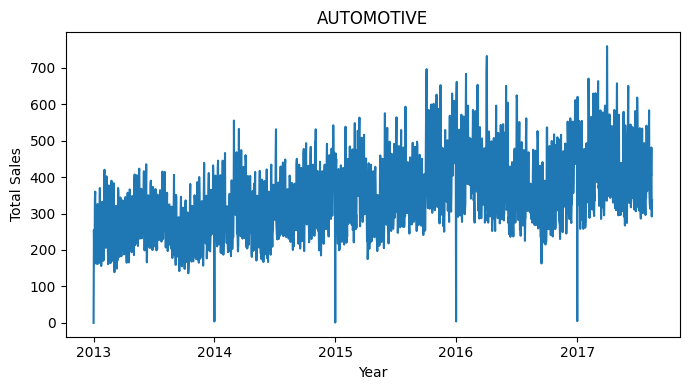

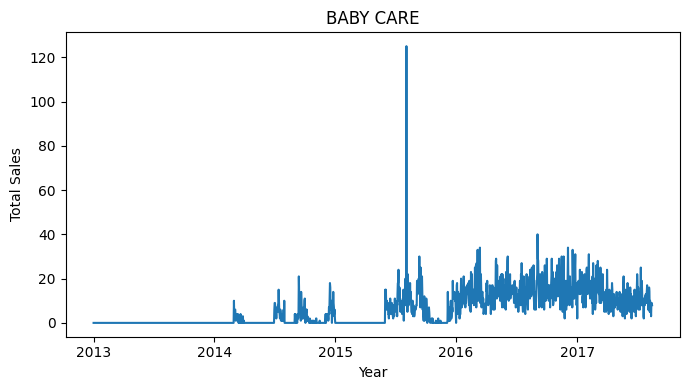

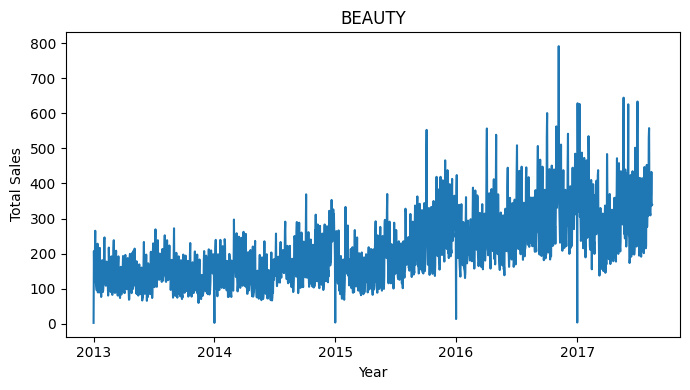

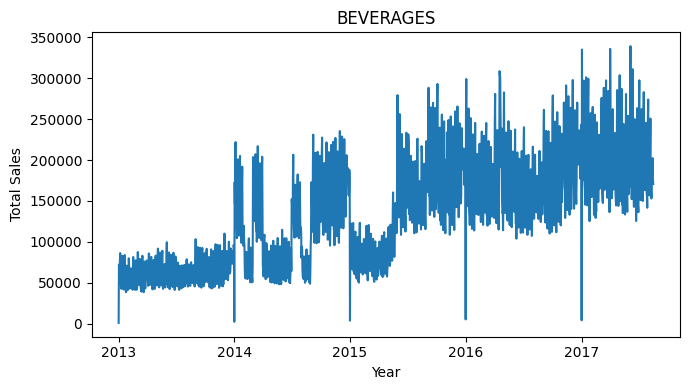

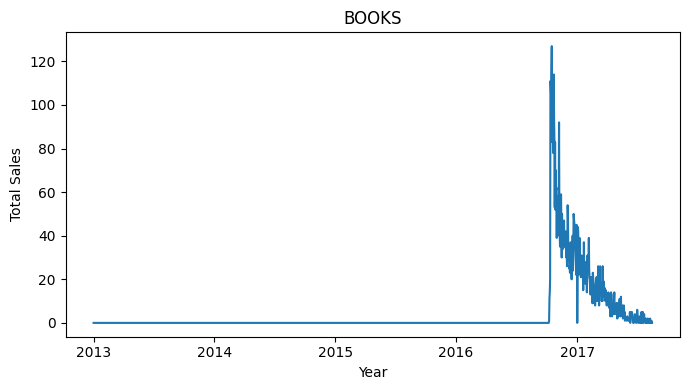

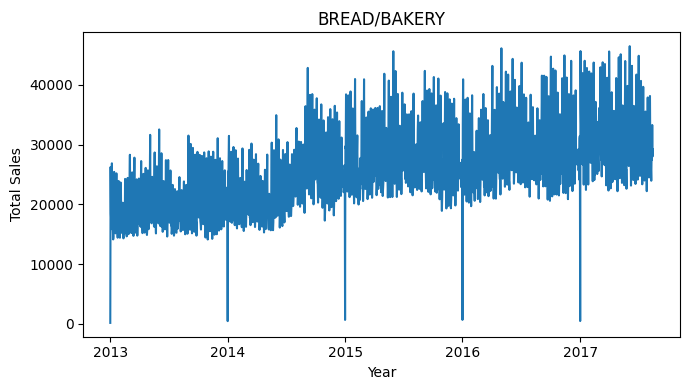

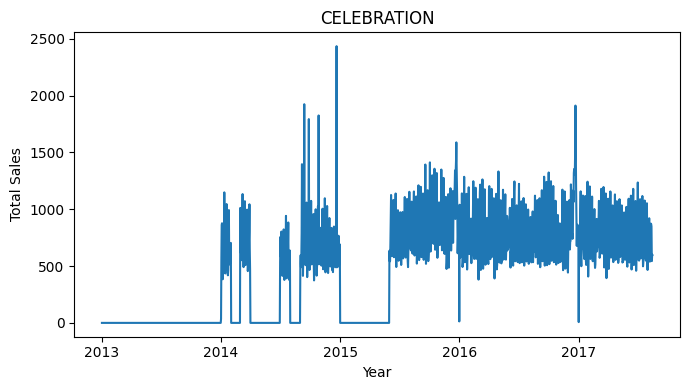

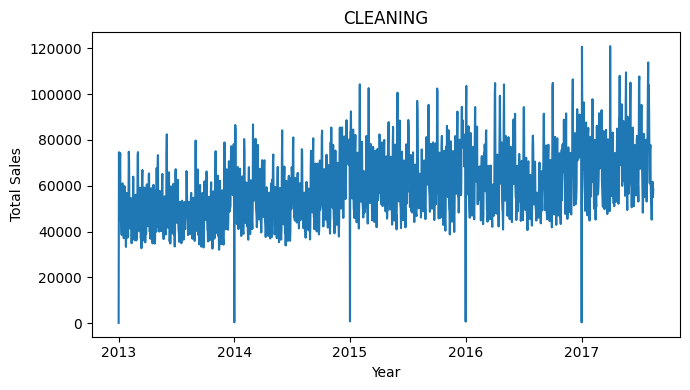

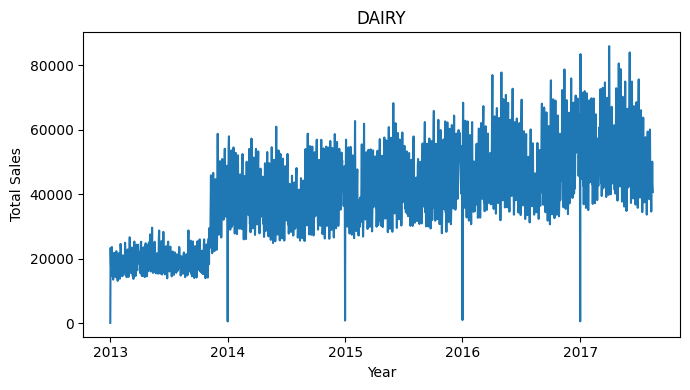

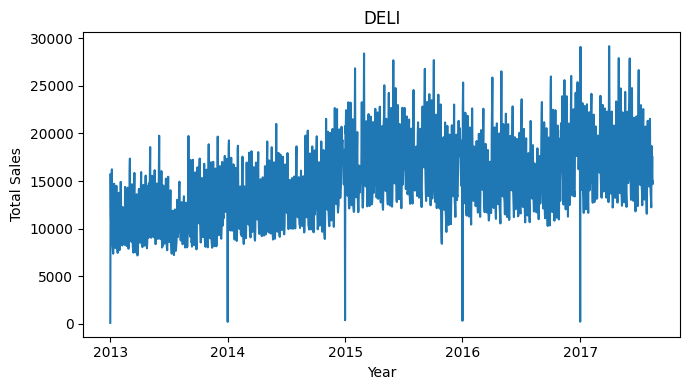

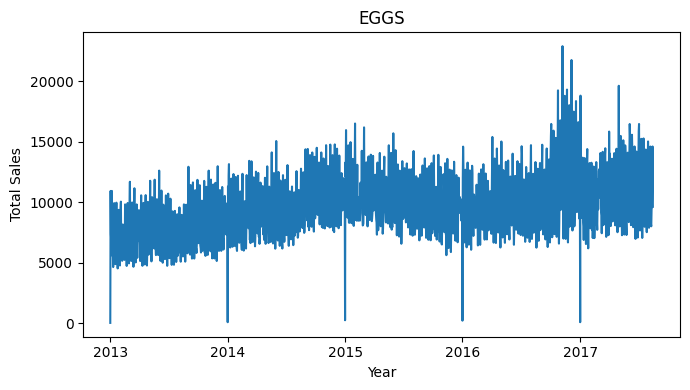

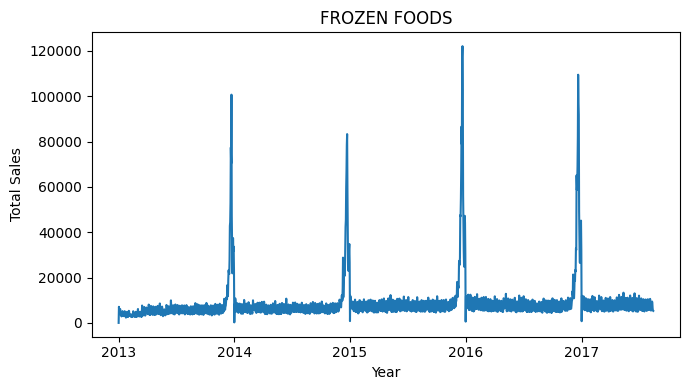

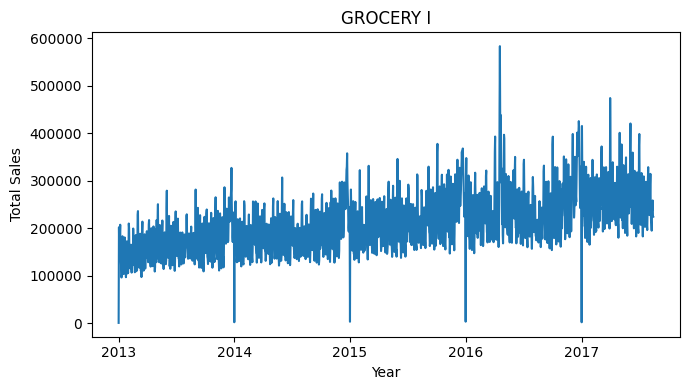

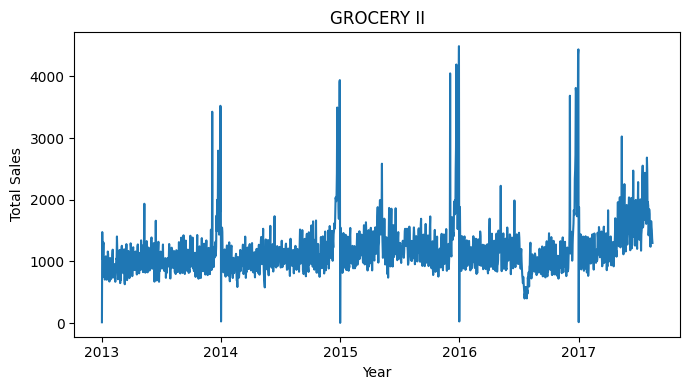

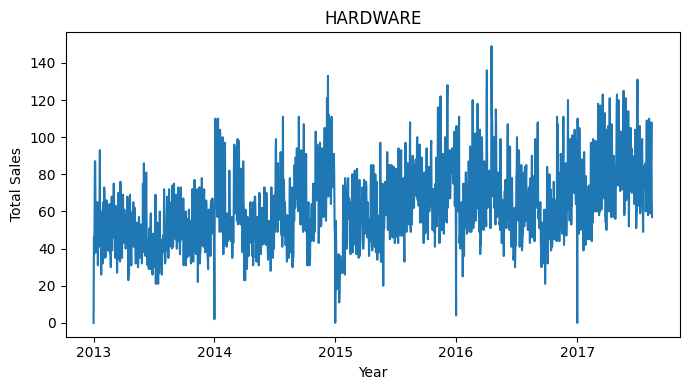

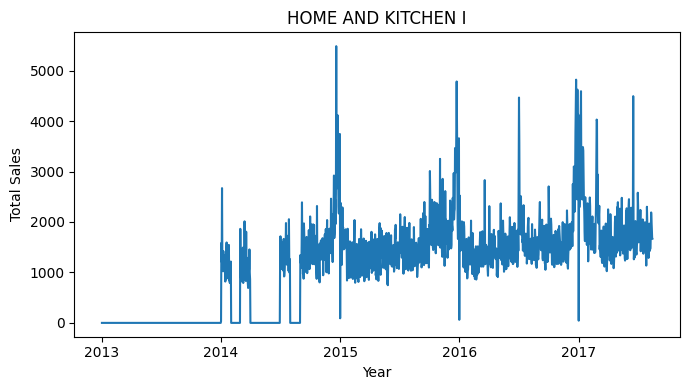

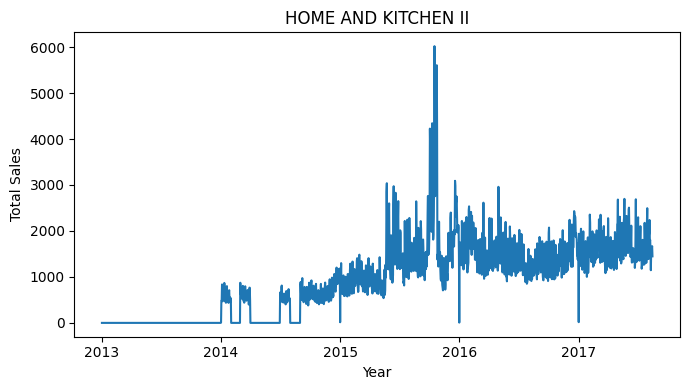

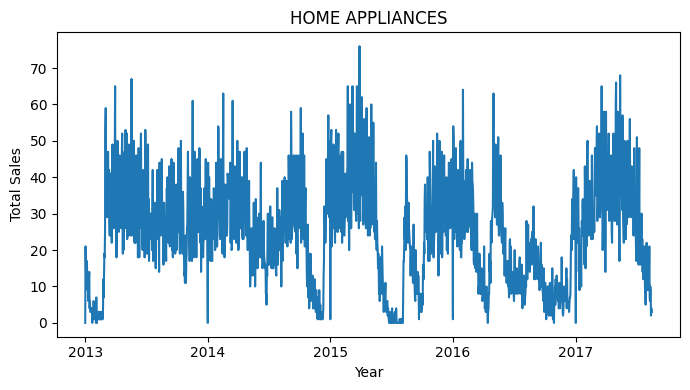

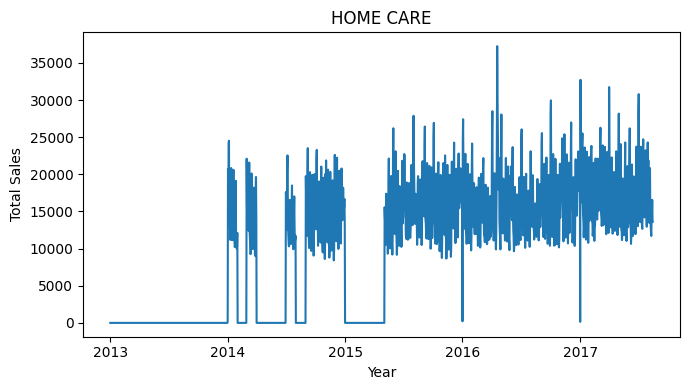

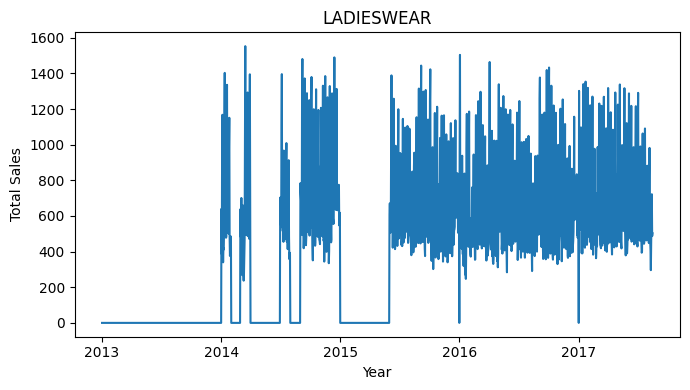

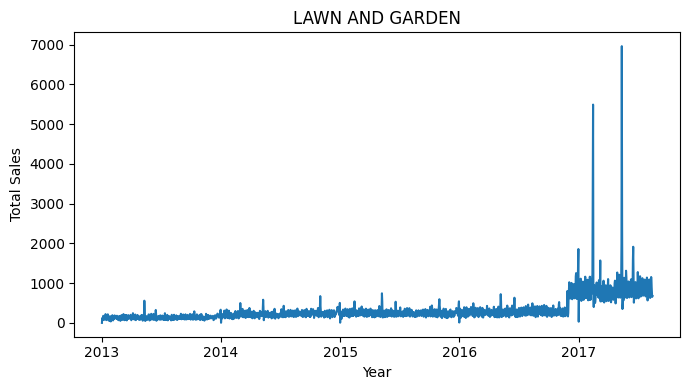

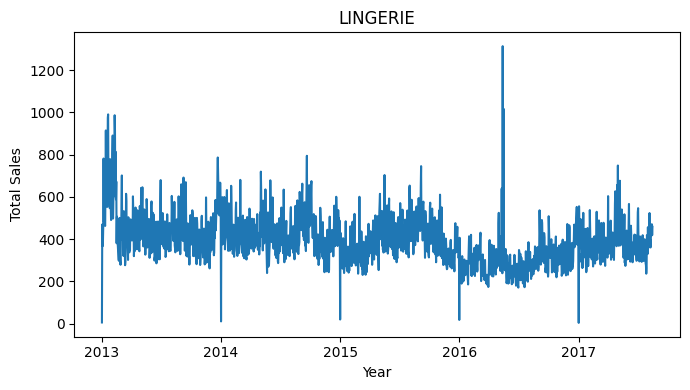

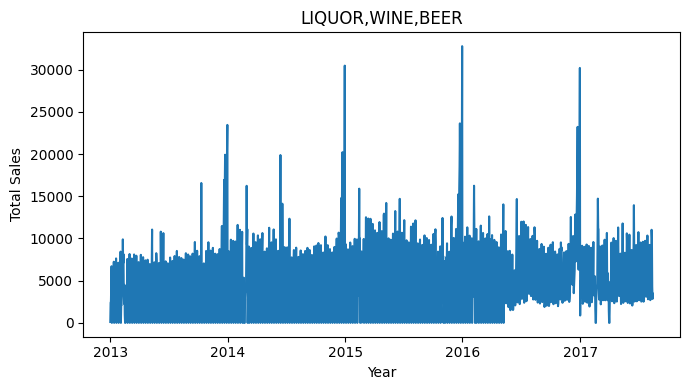

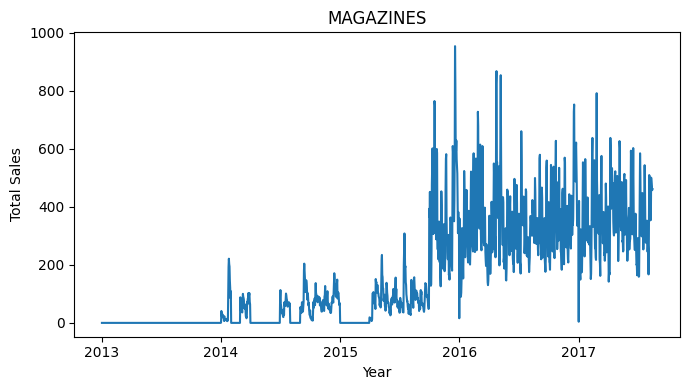

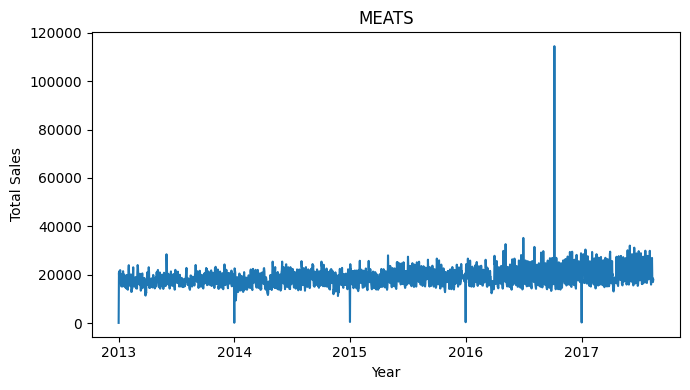

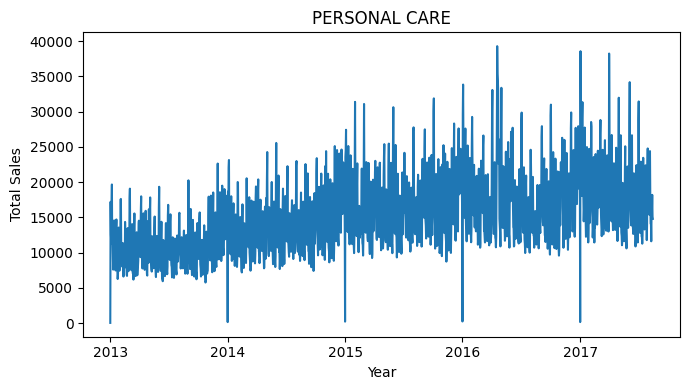

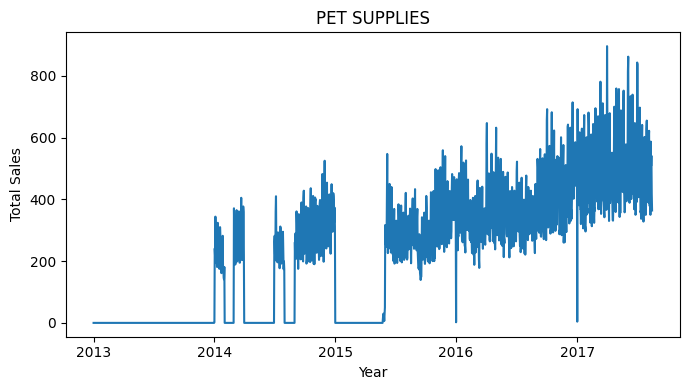

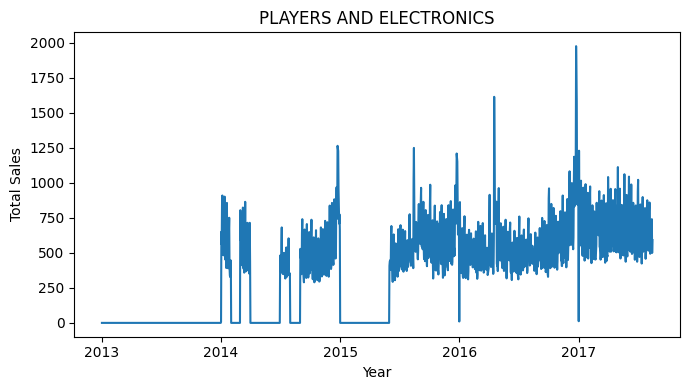

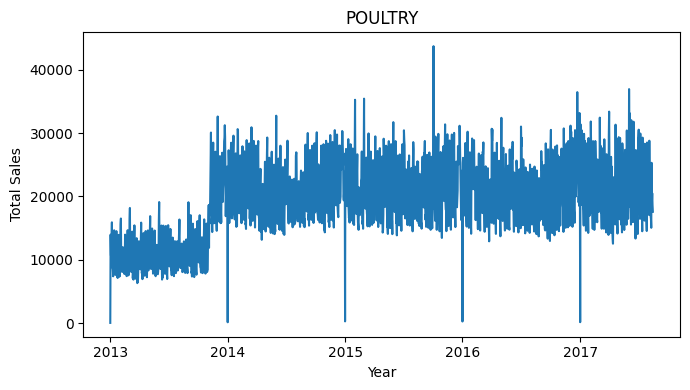

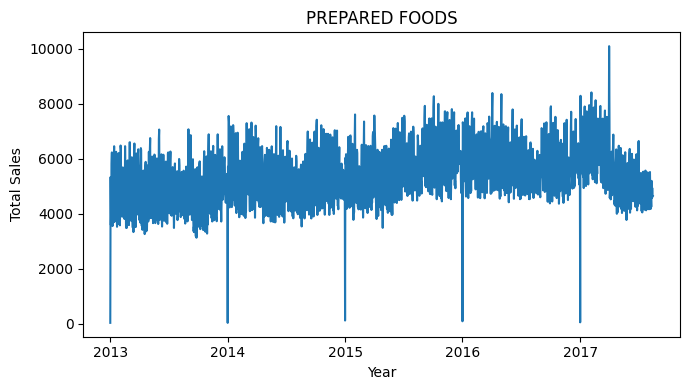

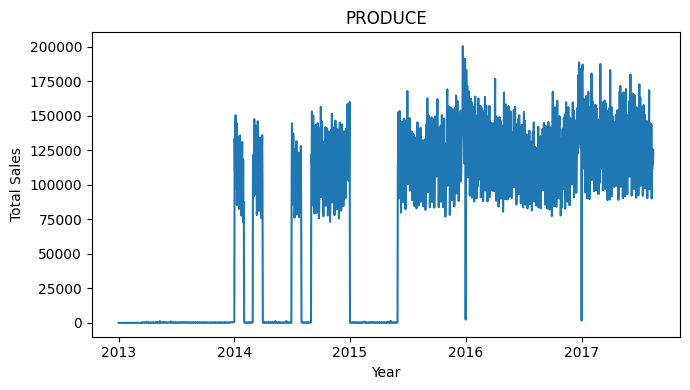

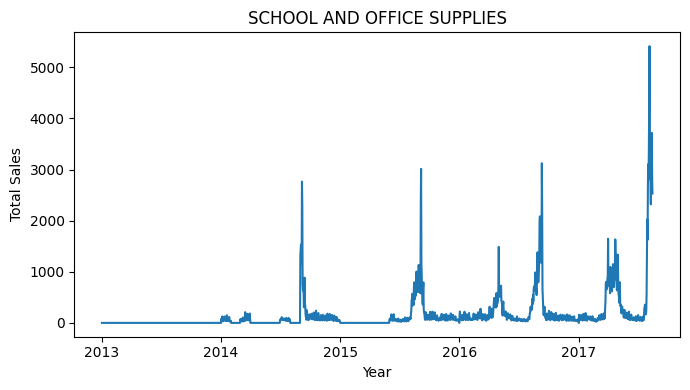

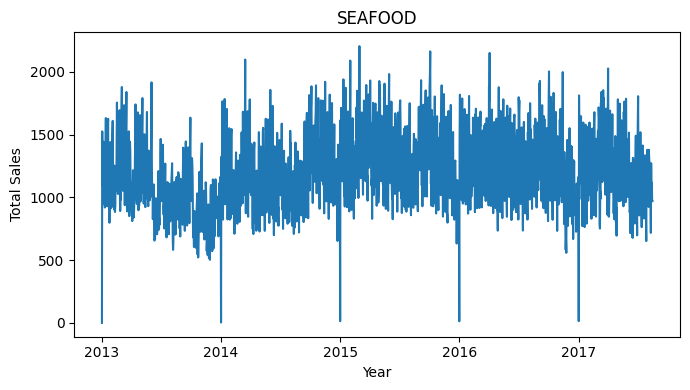

In [97]:
# Create the pivot table and reset the index
total_product_sale_df = data.pivot_table(index='date', columns='family', values='sales', aggfunc='sum').reset_index()
total_product_sale_df

# Start from the second column to exclude 'date'
for product in total_product_sale_df.columns[1:]:
    # Set the figure size
    plt.figure(figsize=(7, 4)) 
    plt.plot(total_product_sale_df['date'], total_product_sale_df[product])
    plt.xlabel('Year')
    plt.ylabel("Total Sales")
    plt.title(f'{product}')
    plt.tight_layout()
    plt.show()

In [23]:
total_product_sale_df.shape

(1684, 34)

In [24]:
# filter data as data before 2015 is inconsistent
total_product_sale_df['date'] = pd.to_datetime(total_product_sale_df['date'])
total_product_sale_df = total_product_sale_df[(total_product_sale_df['date'] > datetime(2014,12,31))]
total_product_sale_df

family,date,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
728,2015-01-01,1.0,0.0,3.0,3528.0,0.0,676.24000,0.0,850.0,875.0,...,0.0,479.767000,203.0,0.0,0.0,279.169980,121.941000,105.00000,0.0,14.000000
729,2015-01-02,465.0,0.0,248.0,111353.0,0.0,29702.92898,0.0,83431.0,43474.0,...,0.0,24370.203999,23581.0,0.0,0.0,26814.086005,6034.370996,756.00000,0.0,1616.319992
730,2015-01-03,410.0,0.0,205.0,110296.0,0.0,29305.08506,0.0,83648.0,45711.0,...,0.0,21044.533846,24531.0,0.0,0.0,24995.854050,5809.893990,595.00000,0.0,1369.749000
731,2015-01-04,450.0,0.0,264.0,122463.0,0.0,38390.82610,0.0,92456.0,56921.0,...,0.0,22198.505007,27428.0,0.0,0.0,27507.856975,6169.286960,272.00000,0.0,1714.197993
732,2015-01-05,328.0,0.0,154.0,88624.0,0.0,29377.54303,0.0,76070.0,43653.0,...,0.0,16451.880920,20566.0,0.0,0.0,20565.498000,4817.860000,72.00000,0.0,1293.245995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2017-08-11,441.0,7.0,351.0,189111.0,0.0,28204.48600,870.0,55682.0,44909.0,...,500.0,26944.092010,15978.0,587.0,654.0,25318.297990,5199.494021,118738.14300,3523.0,1272.615997
1680,2017-08-12,403.0,3.0,369.0,182318.0,0.0,27403.54800,849.0,57935.0,42854.0,...,483.0,17775.650112,15903.0,508.0,712.0,19134.510058,4573.465992,111788.35090,3644.0,1028.030006
1681,2017-08-13,481.0,9.0,433.0,202354.0,1.0,33262.75700,544.0,61757.0,50112.0,...,469.0,18633.015039,18188.0,541.0,741.0,20509.265004,4941.509018,125923.80240,3718.0,1118.047000
1682,2017-08-14,292.0,9.0,337.0,174832.0,0.0,28002.45700,594.0,55032.0,43050.0,...,457.0,16975.686040,15077.0,417.0,500.0,18597.508060,4647.375002,115257.59598,2826.0,970.679999


* Remove low-volume data that can't be predicted.
* Remove situations where there's not enough data.

In [77]:
total_data_copy = total_product_sale_df.copy()
filter_data = total_data_copy.drop('date', axis=1)

# Filter out categories with avg daily sales less than 400
filter_data = filter_data.loc[:, filter_data.mean()>15000]
df = pd.concat([total_data_copy['date'], filter_data], axis=1)
df.shape

(956, 11)

In [78]:
df.to_csv('products_data.csv', index=False)